In [ ]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import LSTM, Conv2D, Flatten

import math
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
gs = pd.read_csv('/content/drive/MyDrive/STATS 315 project/Goldman Sachs Stock.csv')
gs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900
1,1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700
2,1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700
3,1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300
4,1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400
...,...,...,...,...,...,...,...
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800


*** Table 1 ***

<Figure size 800x600 with 0 Axes>

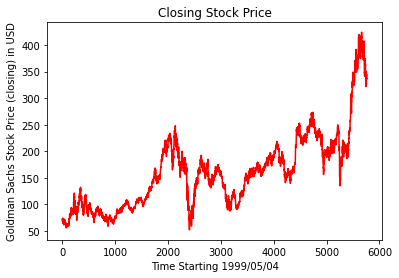

<Figure size 800x600 with 0 Axes>

In [ ]:
closing = gs.reset_index()['Close']
closing
plt.plot(closing, color = "red")
plt.xlabel("Time Starting 1999/05/04")
plt.ylabel("Goldman Sachs Stock Price (closing) in USD")
plt.title("Closing Stock Price")
figure(figsize=(8,6), dpi = 100)

*** Figure 1 ***

In [ ]:
gs.shape
print(closing)

0        70.375000
1        69.125000
2        67.937500
3        74.125000
4        70.687500
           ...    
5757    345.380005
5758    339.000000
5759    343.010010
5760    335.609985
5761    336.230011
Name: Close, Length: 5762, dtype: float64


Text(0.5, 1.0, 'Opening Stock Price')

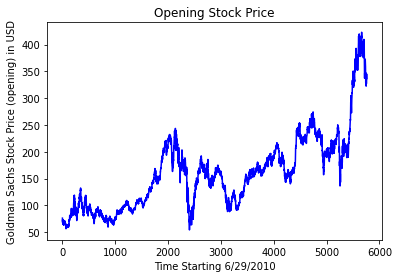

In [ ]:
opening = gs.reset_index()['Open']
plt.plot(opening, color = "blue")
plt.xlabel("Time Starting 1999/05/04")
plt.ylabel("Goldman Sachs Stock Price (opening) in USD")
plt.title("Opening Stock Price")






*** Figure 2 ***

## Now let's fit some model!

But first - I need to rearrange the data so that it will be easily accessible for the future split of train/test datasets.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
closing = scaler.fit_transform(np.array(closing).reshape(-1,1))

First, let's use 70% of the data as our train data, and the rest as for testing.

In [ ]:
size_train = int(len(closing)*0.7)
size_test = len(closing)-size_train

Now we specify the train data and test data.

In [ ]:
train_data,test_data=closing[0:size_train,:],closing[size_train:len(closing),:1]

In [ ]:
size_train, size_test

(4033, 1729)

In [ ]:
def create_dataset(dataset, cons=1):
	temp1, temp2 = [], []
	for i in range(len(dataset)-cons-1):
		a = dataset[i:(i+cons), 0]
		temp1.append(a)
		temp2.append(dataset[i + cons, 0])
	return np.array(temp1), np.array(temp2)

In [ ]:
past = 100
X_train, y_train = create_dataset(train_data, past)
X_test, y_test = create_dataset(test_data, past)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(3932, 100)
(3932,)
(1628, 100)
(1628,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)



In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(3932, 100, 1)
(3932,)
(1628, 100, 1)
(1628,)


(None, None)

Building up layers and models!

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.fit(X_train,y_train,validation_data = (X_test, y_test), epochs=50,batch_size=32,verbose=1)

Epoch 1/50
123/123 [==============================] - 15s 103ms/step - loss: 7.3495e-05 - val_loss: 1.7623e-04
Epoch 2/50
123/123 [==============================] - 12s 94ms/step - loss: 7.4292e-05 - val_loss: 1.7936e-04
Epoch 3/50
123/123 [==============================] - 12s 94ms/step - loss: 7.4833e-05 - val_loss: 2.4097e-04
Epoch 4/50
123/123 [==============================] - 11s 94ms/step - loss: 7.7170e-05 - val_loss: 4.7857e-04
Epoch 5/50
123/123 [==============================] - 12s 95ms/step - loss: 8.7876e-05 - val_loss: 5.3595e-04
Epoch 6/50
123/123 [==============================] - 12s 94ms/step - loss: 7.4187e-05 - val_loss: 2.4137e-04
Epoch 7/50
123/123 [==============================] - 12s 94ms/step - loss: 8.3045e-05 - val_loss: 1.8920e-04
Epoch 8/50
123/123 [==============================] - 12s 95ms/step - loss: 7.3569e-05 - val_loss: 2.6535e-04
Epoch 9/50
123/123 [==============================] - 12s 98ms/step - loss: 7.5657e-05 - val_loss: 2.0661e-04
Epoch 10/

In [ ]:
model_modified =Sequential()
model_modified.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model_modified.add(LSTM(50,return_sequences=True))
model_modified.add(LSTM(50))
model_modified.add(Dense(1))
model_modified.compile(loss='binary_crossentropy',optimizer='adam')
model_modified.fit(X_train,y_train,validation_split = 0.3, epochs=50,batch_size=32,verbose=1)

Epoch 1/50
86/86 [==============================] - 11s 92ms/step - loss: 0.4530 - val_loss: 0.5532
Epoch 2/50
86/86 [==============================] - 7s 82ms/step - loss: 0.4421 - val_loss: 0.5532
Epoch 3/50
86/86 [==============================] - 7s 82ms/step - loss: 0.4419 - val_loss: 0.5530
Epoch 4/50
86/86 [==============================] - 7s 81ms/step - loss: 0.4418 - val_loss: 0.5529
Epoch 5/50
86/86 [==============================] - 7s 82ms/step - loss: 0.4416 - val_loss: 0.5531
Epoch 6/50
86/86 [==============================] - 7s 83ms/step - loss: 0.4415 - val_loss: 0.5530
Epoch 7/50
86/86 [==============================] - 7s 83ms/step - loss: 0.4414 - val_loss: 0.5528
Epoch 8/50
86/86 [==============================] - 7s 82ms/step - loss: 0.4414 - val_loss: 0.5531
Epoch 9/50
86/86 [==============================] - 7s 82ms/step - loss: 0.4413 - val_loss: 0.5528
Epoch 10/50
86/86 [==============================] - 7s 81ms/step - loss: 0.4413 - val_loss: 0.5528
Epoch 11

In [ ]:
acc = model.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for model:', acc)

acc_mo = model_modified.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for model_modified:', acc_mo)

543/543 [==============================] - 6s 12ms/step - loss: 8.8691e-04
Accuracy for model: 0.0008869105949997902
543/543 [==============================] - 6s 11ms/step - loss: 0.6187
Accuracy for model_modified: 0.6187497973442078


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

51/51 [==============================] - 1s 22ms/step


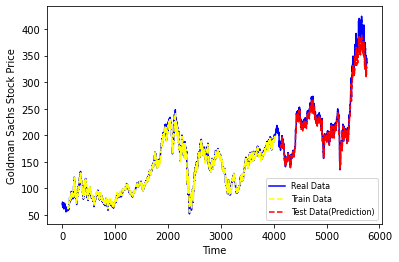

<Figure size 1440x720 with 0 Axes>

In [ ]:
past=100
trainPredictPlot = np.empty_like(closing)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[past:len(train_predict)+past, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(closing)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(past*2)+1:len(closing)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(closing), color = 'blue', linestyle = 'solid')
plt.plot(trainPredictPlot, color = 'yellow', linestyle = 'dashed')
plt.plot(testPredictPlot, color = 'red', linestyle = 'dashed')
plt.xlabel("Time")
plt.ylabel("Goldman Sachs Stock Price")
plt.legend(["Real Data", "Train Data", "Test Data(Prediction)"], loc = 'lower right', prop = {'size' : 8})
figure(figsize=(20,10))
plt.show()













*** Figure 3 ***

As shown above, it is a very good prediction!

Now we reduce the number of units in each LSTM layers to see the effects on overall accuracy

In [ ]:
model2=Sequential()
model2.add(LSTM(10,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(10,return_sequences=True))
model2.add(LSTM(10))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.fit(X_train,y_train,validation_data = (X_test, y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
123/123 [==============================] - 13s 70ms/step - loss: 0.0046 - val_loss: 0.0082
Epoch 2/50
123/123 [==============================] - 8s 62ms/step - loss: 4.9210e-04 - val_loss: 0.0051
Epoch 3/50
123/123 [==============================] - 8s 63ms/step - loss: 4.3992e-04 - val_loss: 0.0039
Epoch 4/50
123/123 [==============================] - 8s 63ms/step - loss: 3.7403e-04 - val_loss: 0.0018
Epoch 5/50
123/123 [==============================] - 8s 66ms/step - loss: 3.6935e-04 - val_loss: 0.0017
Epoch 6/50
123/123 [==============================] - 9s 74ms/step - loss: 3.1651e-04 - val_loss: 0.0011
Epoch 7/50
123/123 [==============================] - 9s 71ms/step - loss: 2.9143e-04 - val_loss: 8.6038e-04
Epoch 8/50
123/123 [==============================] - 8s 67ms/step - loss: 2.8343e-04 - val_loss: 0.0016
Epoch 9/50
123/123 [==============================] - 11s 90ms/step - loss: 2.9923e-04 - val_loss: 0.0014
Epoch 10/50
123/123 [==============================] 

In [ ]:
acc2 = model2.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for model2:', acc2)

543/543 [==============================] - 5s 9ms/step - loss: 9.7827e-04
Accuracy for model2: 0.0009782687993720174


Then we try to use a SimpleRNN model to predict:

In [ ]:
model3 = Sequential()
model3.add(SimpleRNN(units = 50, activation='relu'))
model3.add(Dense(1))
model3.compile(loss = 'mean_squared_error', optimizer = 'adam')
model3.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
123/123 [==============================] - 2s 10ms/step - loss: 0.0022
Epoch 2/50
123/123 [==============================] - 1s 11ms/step - loss: 1.0879e-04
Epoch 3/50
123/123 [==============================] - 1s 11ms/step - loss: 1.0077e-04
Epoch 4/50
123/123 [==============================] - 2s 13ms/step - loss: 9.0056e-05
Epoch 5/50
123/123 [==============================] - 1s 11ms/step - loss: 8.5205e-05
Epoch 6/50
123/123 [==============================] - 1s 11ms/step - loss: 8.1837e-05
Epoch 7/50
123/123 [==============================] - 1s 11ms/step - loss: 7.5709e-05
Epoch 8/50
123/123 [==============================] - 1s 11ms/step - loss: 7.6451e-05
Epoch 9/50
123/123 [==============================] - 1s 10ms/step - loss: 7.2832e-05
Epoch 10/50
123/123 [==============================] - 1s 10ms/step - loss: 7.0955e-05
Epoch 11/50
123/123 [==============================] - 1s 10ms/step - loss: 6.9696e-05
Epoch 12/50
123/123 [==============================] - 1

In [ ]:
acc3 = model3.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for model3:', acc3)

543/543 [==============================] - 2s 3ms/step - loss: 1.7643e-04
Accuracy for model3: 0.00017642784223426133


The shown loss is very convincing, let's make a small change to see the difference:

In [ ]:
model3_modified = Sequential()
model3_modified.add(SimpleRNN(units = 5, activation='relu'))
model3_modified.add(Dense(1))
model3_modified.compile(loss = 'mean_squared_error', optimizer = 'adam')
model3_modified.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
123/123 [==============================] - 2s 7ms/step - loss: 0.0181
Epoch 2/50
123/123 [==============================] - 1s 7ms/step - loss: 2.9056e-04
Epoch 3/50
123/123 [==============================] - 1s 7ms/step - loss: 7.3866e-05
Epoch 4/50
123/123 [==============================] - 1s 8ms/step - loss: 6.6546e-05
Epoch 5/50
123/123 [==============================] - 1s 8ms/step - loss: 6.9037e-05
Epoch 6/50
123/123 [==============================] - 1s 8ms/step - loss: 6.8653e-05
Epoch 7/50
123/123 [==============================] - 1s 8ms/step - loss: 7.0779e-05
Epoch 8/50
123/123 [==============================] - 1s 8ms/step - loss: 6.7384e-05
Epoch 9/50
123/123 [==============================] - 1s 8ms/step - loss: 7.3347e-05
Epoch 10/50
123/123 [==============================] - 1s 8ms/step - loss: 7.0180e-05
Epoch 11/50
123/123 [==============================] - 1s 8ms/step - loss: 6.7955e-05
Epoch 12/50
123/123 [==============================] - 1s 8ms/step 

In [ ]:
acc3_mo = model3_modified.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for model3_modified:', acc3_mo)

543/543 [==============================] - 2s 4ms/step - loss: 0.0222
Accuracy for model3_modified: 0.022191757336258888


With a significant decrease in the number of units, the accuracy decreased. However, the model is still very convincing based on the high accuracy.

In [ ]:
train_predict3=model3.predict(X_train)
test_predict3=model3.predict(X_test)

train_predict3=scaler.inverse_transform(train_predict3)
test_predict3=scaler.inverse_transform(test_predict3)

51/51 [==============================] - 0s 4ms/step


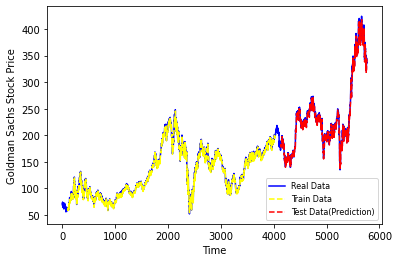

<Figure size 1440x720 with 0 Axes>

In [ ]:
past=100
trainPredictPlot3 = np.empty_like(closing)
trainPredictPlot3[:, :] = np.nan
trainPredictPlot3[past:len(train_predict3)+past, :] = train_predict3
# shift test predictions for plotting
testPredictPlot3 = np.empty_like(closing)
testPredictPlot3[:, :] = np.nan
testPredictPlot3[len(train_predict3)+(past*2)+1:len(closing)-1, :] = test_predict3

# plot baseline and predictions
plt.plot(scaler.inverse_transform(closing), color = 'blue', linestyle = 'solid')
plt.plot(trainPredictPlot3, color = 'yellow', linestyle = 'dashed')
plt.plot(testPredictPlot3, color = 'red', linestyle = 'dashed')
plt.xlabel("Time")
plt.ylabel("Goldman Sachs Stock Price")
plt.legend(["Real Data", "Train Data", "Test Data(Prediction)"], loc = 'lower right', prop = {'size' : 8})
figure(figsize=(20,10))
plt.show()

*** Figure 4 ***

It is a very good fit for our dataset, as the red line (prediction) aligns with the blue line (true data) very well thoroughly.

# Now we fit with a different layer type

In [ ]:
model4 = Sequential()

model4.add(Flatten())
model4.add(Dense(50, activation = 'relu'))
model4.add(Dense(10, activation = 'relu'))
model4.add(Dense(10, activation = 'relu'))
model4.add(Dense(1))

In [ ]:
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')
model4.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 6.7698e-04
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 3.9614e-04
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss: 3.1077e-04
Epoch 5/50
123/123 [==============================] - 0s 1ms/step - loss: 2.5261e-04
Epoch 6/50
123/123 [==============================] - 0s 1ms/step - loss: 2.3819e-04
Epoch 7/50
123/123 [==============================] - 0s 1ms/step - loss: 2.1408e-04
Epoch 8/50
123/123 [==============================] - 0s 1ms/step - loss: 1.9155e-04
Epoch 9/50
123/123 [==============================] - 0s 1ms/step - loss: 1.8773e-04
Epoch 10/50
123/123 [==============================] - 0s 1ms/step - loss: 1.7703e-04
Epoch 11/50
123/123 [==============================] - 0s 1ms/step - loss: 1.7603e-04
Epoch 12/50
123/123 [==============================] - 0s 1ms/step 

In [ ]:
acc4 = model4.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for model4', acc4)

543/543 [==============================] - 1s 895us/step - loss: 3.0982e-04
Accuracy for model4 0.00030981944291852415


In [ ]:
train_predict4=model4.predict(X_train)
test_predict4=model4.predict(X_test)

51/51 [==============================] - 0s 2ms/step


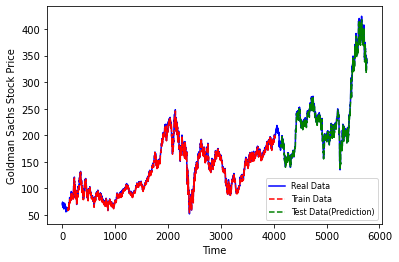

<Figure size 1440x720 with 0 Axes>

In [ ]:
past=100
trainPredictPlot4 = np.empty_like(closing)
trainPredictPlot4[:, :] = np.nan
trainPredictPlot4[past:len(train_predict4)+past, :] = train_predict4
# shift test predictions for plotting
testPredictPlot4 = np.empty_like(closing)
testPredictPlot4[:, :] = np.nan
testPredictPlot4[len(train_predict4)+(past*2)+1:len(closing)-1, :] = test_predict4

# plot baseline and predictions
plt.plot(scaler.inverse_transform(closing), color = 'blue', linestyle = 'solid')
plt.plot(trainPredictPlot3, color = 'red', linestyle = 'dashed')
plt.plot(testPredictPlot3, color = 'green', linestyle = 'dashed')
plt.xlabel("Time")
plt.ylabel("Goldman Sachs Stock Price")
plt.legend(["Real Data", "Train Data", "Test Data(Prediction)"], loc = 'lower right', prop = {'size' : 8})
figure(figsize=(20,10))
plt.show()

*** Figure 5 ***

Again, our predicted stock prices (gree line) is very close to the underlying real stock prices (blue line). This is also a very good fit!

## Non-Sequential Model

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
import urllib.request
from tensorflow.python.ops.array_ops import tensor_strided_slice_update
import tensorflow as tf
from tensorflow.keras import Model, layers

class NonSequential(Model):
  def __init__(self):
    super(NonSequential, self).__init__()
    self.rnn = layers.SimpleRNN(64)
    self.relu1 = layers.Activation('relu')

    self.flatten1 = layers.Flatten()
    self.dense1 = layers.Dense(20)

    self.flatten2 = layers.Flatten()
    self.dense2 = layers.Dense(20)
    self.relu3 = layers.Activation('relu')

    self.dense3 = layers.Dense(1)

  def call(self, x):
    weighted_x = self.rnn(x)
    weighted_x = self.relu1(weighted_x)

    weighted_x2 = self.flatten1(weighted_x)
    weighted_x2 = self.dense1(weighted_x2)

    weighted_x3 = self.flatten2(weighted_x)
    weighted_x3 = self.dense2(weighted_x3)
    weighted_x3 = self.relu3(weighted_x3)

    return self.dense3(weighted_x2 + weighted_x3)


model_nS = NonSequential()

model_nS.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_nS.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
123/123 [==============================] - 2s 11ms/step - loss: 0.0024
Epoch 2/50
123/123 [==============================] - 1s 11ms/step - loss: 2.0963e-04
Epoch 3/50
123/123 [==============================] - 1s 11ms/step - loss: 1.4717e-04
Epoch 4/50
123/123 [==============================] - 1s 11ms/step - loss: 1.2829e-04
Epoch 5/50
123/123 [==============================] - 1s 10ms/step - loss: 1.0531e-04
Epoch 6/50
123/123 [==============================] - 1s 11ms/step - loss: 1.1295e-04
Epoch 7/50
123/123 [==============================] - 2s 15ms/step - loss: 1.2138e-04
Epoch 8/50
123/123 [==============================] - 2s 13ms/step - loss: 9.6676e-05
Epoch 9/50
123/123 [==============================] - 1s 11ms/step - loss: 8.0953e-05
Epoch 10/50
123/123 [==============================] - 1s 11ms/step - loss: 9.1994e-05
Epoch 11/50
123/123 [==============================] - 1s 11ms/step - loss: 8.1743e-05
Epoch 12/50
123/123 [==============================] - 1

In [ ]:
acc_ns = model_nS.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for Non-Sequential model', acc_ns)

543/543 [==============================] - 2s 3ms/step - loss: 4.5392e-04
Accuracy for Non-Sequential model 0.0004539211804512888


We see that the accuracy for this non-sequential model is also very high. We change a little bit and check the accuracy again.


In [ ]:
class NonSequential2(Model):
  def __init__(self):
    super(NonSequential2, self).__init__()
    self.conv1 = layers.conv1D(64, input_shape = (100,1))
    self.relu1 = layers.Activation('relu')

    self.flatten1 = layers.Flatten()
    self.dense1 = layers.Dense(20)

    self.flatten2 = layers.Flatten()
    self.dense2 = layers.Dense(20)
    self.relu3 = layers.Activation('relu')

    self.dense3 = layers.Dense(1)

  def call(self, x):
    weighted_x = self.conv1(x)
    weighted_x = self.relu1(weighted_x)

    weighted_x2 = self.flatten1(weighted_x)
    weighted_x2 = self.dense1(weighted_x2)

    weighted_x3 = self.flatten2(weighted_x)
    weighted_x3 = self.dense2(weighted_x3)
    weighted_x3 = self.relu3(weighted_x3)

    return self.dense3(weighted_x2 + weighted_x3)


model_nS2 = NonSequential()

model_nS2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_nS2.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
123/123 [==============================] - 2s 11ms/step - loss: 0.0047
Epoch 2/50
123/123 [==============================] - 1s 11ms/step - loss: 1.8139e-04
Epoch 3/50
123/123 [==============================] - 1s 11ms/step - loss: 1.4606e-04
Epoch 4/50
123/123 [==============================] - 1s 11ms/step - loss: 1.2695e-04
Epoch 5/50
123/123 [==============================] - 1s 11ms/step - loss: 1.0659e-04
Epoch 6/50
123/123 [==============================] - 1s 11ms/step - loss: 9.9103e-05
Epoch 7/50
123/123 [==============================] - 1s 11ms/step - loss: 9.3299e-05
Epoch 8/50
123/123 [==============================] - 1s 11ms/step - loss: 1.0451e-04
Epoch 9/50
123/123 [==============================] - 1s 11ms/step - loss: 8.5892e-05
Epoch 10/50
123/123 [==============================] - 1s 11ms/step - loss: 8.6020e-05
Epoch 11/50
123/123 [==============================] - 1s 10ms/step - loss: 7.6947e-05
Epoch 12/50
123/123 [==============================] - 1

In [ ]:
acc_ns2 = model_nS2.evaluate(X_test, y_test, batch_size=3)
print('Accuracy for Non-Sequential model 2', acc_ns2)

543/543 [==============================] - 2s 3ms/step - loss: 7.4554e-04
Accuracy for Non-Sequential model 2 0.0007455385639332235


We see the accuracy decrease a little bit, but this model is still very good. We observe that even we did not use any SimpleRNN or LSTM layers, we can still arrive at some pretty decent outcomes using sequential and non-sequential models.

## Linear Regression Model

In [ ]:
X_LR = gs[['High','Low','Open','Volume']].values
y_LR = gs['Close'].values

In [ ]:
X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split(X_LR,y_LR, test_size=0.3, random_state=1)

In [ ]:
rg = LinearRegression()
rg.fit(X_LR_train, y_LR_train)
print(rg.coef_)
print(rg.intercept_)

prediction = rg.predict(X_LR_test)
print(prediction)

[ 7.95954956e-01  7.92577066e-01 -5.88396122e-01  1.16758272e-08]
-0.06227950409197547
[216.14365765 210.18982355 197.09339735 ... 188.96856919 151.11622747
  76.05420306]


Do comparison with the true closing stock price:

In [ ]:
data = pd.DataFrame({'Actual': y_LR_test.flatten(), 'Predicted' : prediction.flatten()})
data

,Actual,Predicted
0,217.139999,216.143658
1,209.940002,210.189824
2,196.419998,197.093397
3,110.875000,111.041833
4,81.500000,81.276313
...,...,...
1724,158.240005,157.779724
1725,243.940002,245.102347
1726,189.779999,188.968569
1727,149.949997,151.116227


*** Table 2 ***

0.20982297813259285


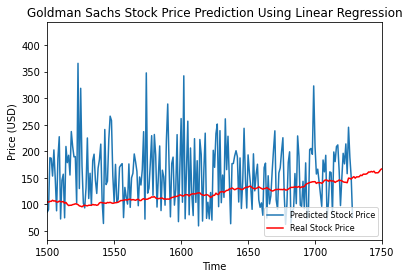

In [ ]:
x=0
for i in range(0, 1729):
   if np.abs(y_LR_test[i] - prediction[i])<1:
      x=x+1
print(x/len(gs))

plt.plot(data["Predicted"])
plt.plot(gs['Close'], color = "red")

plt.xlim([1500, 1750])
plt.title("Goldman Sachs Stock Price Prediction Using Linear Regression")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend(["Predicted Stock Price", "Real Stock Price"], loc = 'lower right', prop = {'size' : 8})

*** Figure 6 ***

When the real stock price is within $1 of the predicted stock price, we considered it as close enough and hence a good guess.

By the table above, we find that approximately 21% of our result lied within the good guess range. This is a relatively low accuracy. We also observe the plot above, our predicted stock price bounce back and forth continuously, representing an unsteady state. Therefore, by comaprison, clearly we should go for the neural networks for stock price prediction tasks.
